## HIERARCHY CLUSTERING

In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import AgglomerativeClustering

In [3]:
df=pd.read_csv(r'C:\Users\aksha\Downloads\crime_data (1).csv')

In [4]:
df

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [6]:
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [7]:
features=df.drop('Unnamed: 0',axis=1)

In [8]:
features

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


In [9]:
import scipy.cluster.hierarchy as sch

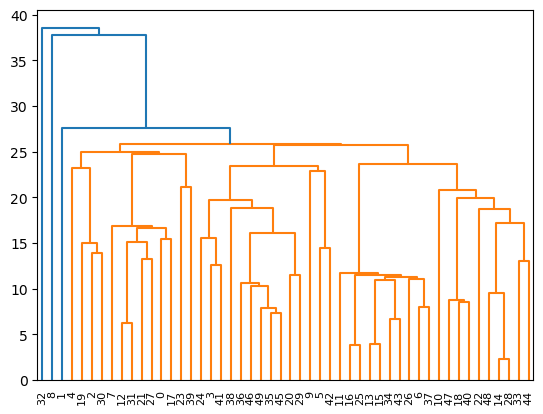

In [10]:
dendrogram=sch.dendrogram(sch.linkage(features,method='single'))

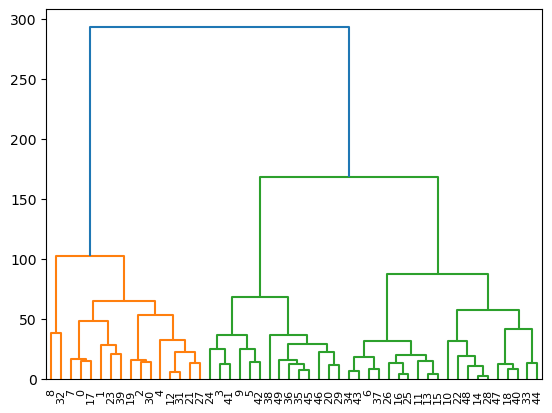

In [11]:
dendrogram=sch.dendrogram(sch.linkage(features,method='complete'))

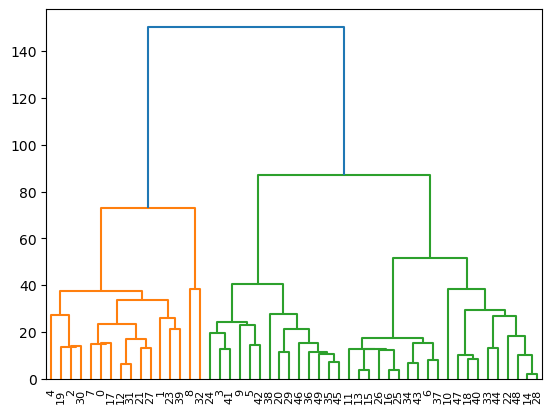

In [12]:
dendrogram=sch.dendrogram(sch.linkage(features,method='centroid'))

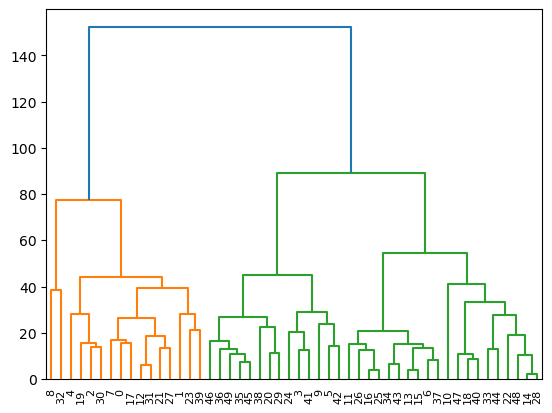

In [13]:
dendrogram=sch.dendrogram(sch.linkage(features,method='average'))

In [14]:
#taking n as 3

In [15]:
agg=AgglomerativeClustering(n_clusters=3,linkage='average')

In [16]:
cluster=agg.fit(features)

In [17]:
cluster

AgglomerativeClustering(linkage='average', n_clusters=3)

In [18]:
cluster.labels_

array([0, 0, 0, 2, 0, 2, 1, 0, 0, 2, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 2, 0,
       1, 0, 2, 1, 1, 0, 1, 2, 0, 0, 0, 1, 1, 2, 2, 1, 2, 0, 1, 2, 2, 1,
       1, 2, 2, 1, 1, 2], dtype=int64)

In [19]:
np.unique(cluster.labels_)

array([0, 1, 2], dtype=int64)

In [20]:
from sklearn.metrics import silhouette_score

In [21]:
silhouette_score(features,cluster.labels_)

0.5319024108339816